<a href="https://colab.research.google.com/github/NoobBeginnerReal/Customer-Segmentation-UCI-ML/blob/main/Customer_Segmentation_UCI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [ ]:
import pandas as pd

df=pd.concat([X,y],axis=1)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB
None
                           Description  Quantity     InvoiceDate  UnitPrice  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/2010 8:26       2.55   
1                  WHITE METAL LANTERN         6  12/1/2010 8:26       3.39   
2       CREAM CUPID HEARTS COAT HANGER         8  12/1/2010 8:26       2.75   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/2010 8:26       3.39   
4       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/2010 8:26       3.39   

   

In [ ]:
# Conver dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Extract the first purchase month for each customer
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
# Extract transaction month
df['TransactionMonth'] = df['InvoiceDate'].dt.to_period('M')

df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CohortMonth,TransactionMonth
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12


In [ ]:
# Extract year and month separately for cohort and transaction
cohort_year, cohort_month = df['CohortMonth'].dt.year, df['CohortMonth'].dt.month
trans_year, trans_month = df['TransactionMonth'].dt.year, df['TransactionMonth'].dt.month

# Compute cohort index (time offset in months)
df['CohortIndex'] = (trans_year - cohort_year) * 12 + (trans_month - cohort_month) + 1

df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CohortMonth,TransactionMonth,CohortIndex
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,1
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,1
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,1


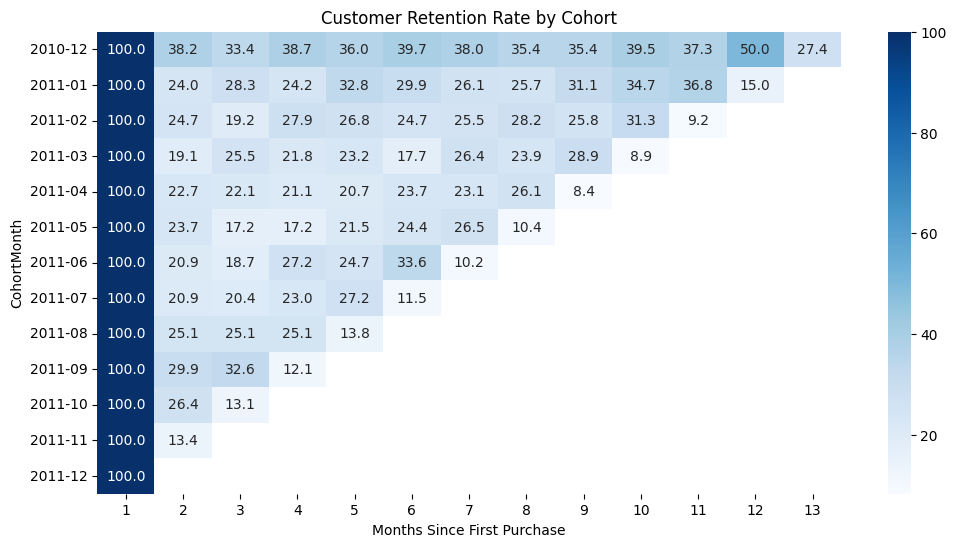

In [ ]:
# Count unique customers per cohort and time offset
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().unstack(0)

# Convert to percentage (retention rate)
cohort_retention = cohort_counts.divide(cohort_counts.iloc[0], axis=1) * 100

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(cohort_retention.T, annot=True, fmt=".1f", cmap="Blues")
plt.title("Customer Retention Rate by Cohort")
plt.ylabel("CohortMonth")
plt.xlabel("Months Since First Purchase")
plt.show()

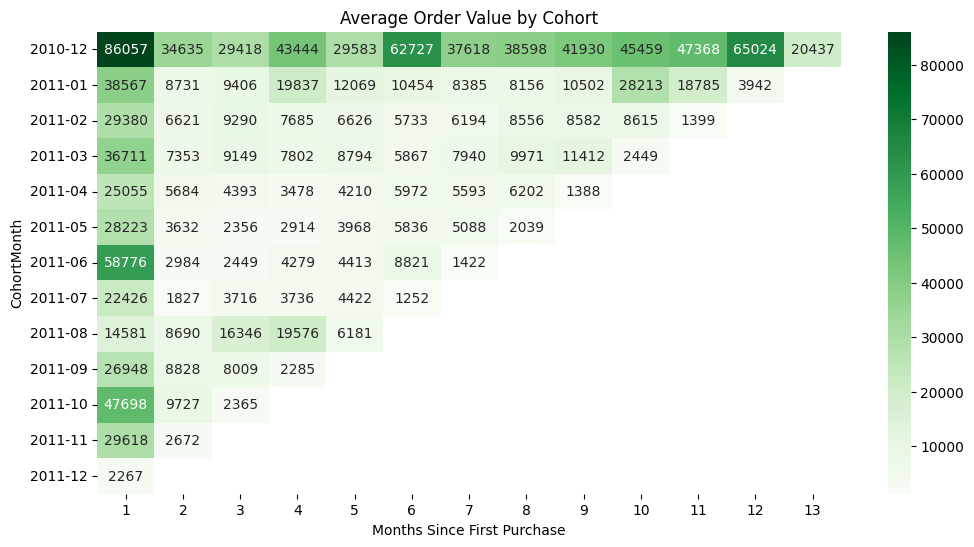

In [ ]:
# Compute average order value per cohort
cohort_revenue = df.groupby(['CohortMonth', 'CohortIndex'])['UnitPrice'].sum().unstack(0)

plt.figure(figsize=(12, 6))
sns.heatmap(cohort_revenue.T, annot=True, fmt=".0f", cmap="Greens")
plt.title("Average Order Value by Cohort")
plt.ylabel("CohortMonth")
plt.xlabel("Months Since First Purchase")
plt.show()

In [ ]:
import pandas as pd
import datetime as dt

# Drop missing CustomerIDs
df = df.dropna(subset=['CustomerID'])

# Convert CustomerID to integer (it's currently float)
df['CustomerID'] = df['CustomerID'].astype(int)

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Define reference date (latest purchase date in the dataset)
reference_date = df['InvoiceDate'].max()


<ipython-input-7-5d334b2d4250>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)
<ipython-input-7-5d334b2d4250>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# Compute RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency (days since last purchase)
    'Quantity': 'count',  # Frequency (number of transactions)
    'UnitPrice': lambda x: (x * df.loc[x.index, 'Quantity']).sum()  # Monetary (total amount spent)
})

# Rename columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'Quantity': 'Frequency', 'UnitPrice': 'Monetary'}, inplace=True)

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346,325,2,0.00
12347,1,182,4310.00
12348,74,31,1797.24
12349,18,73,1757.55
12350,309,17,334.40


In [ ]:
# Create RFM score for each metric
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])  # Lower recency is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=4, labels=[1, 2, 3, 4])  # Higher frequency is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4])  # Higher monetary value is better

# Combine RFM scores into a single RFM segment
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346,325,2,0.00,1,1,1,111
12347,1,182,4310.00,4,4,4,444
12348,74,31,1797.24,2,2,4,224
12349,18,73,1757.55,3,3,4,334
12350,309,17,334.40,1,1,2,112


In [ ]:
def segment_customer(rfm_score):
    if rfm_score in ['444', '443', '433', '434']:
        return 'Best Customers'
    elif rfm_score in ['344', '343', '334', '333']:
        return 'Loyal Customers'
    elif rfm_score in ['244', '234', '223']:
        return 'Potential Loyalist'
    elif rfm_score in ['144', '143', '134']:
        return 'New Customers'
    elif rfm_score in ['111', '112', '121', '131']:
        return 'Lost Customers'
    else:
        return 'Other'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12346,325,2,0.00,1,1,1,111,Lost Customers
12347,1,182,4310.00,4,4,4,444,Best Customers
12348,74,31,1797.24,2,2,4,224,Other
12349,18,73,1757.55,3,3,4,334,Loyal Customers
12350,309,17,334.40,1,1,2,112,Lost Customers


In [ ]:
rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).sort_values(by='Monetary', ascending=False)


,Recency,Frequency,Monetary
Segment,,,
Best Customers,6.238276,262.561470,6020.429721
Loyal Customers,29.090056,153.317073,2773.052816
New Customers,207.614035,144.140351,2257.797737
Potential Loyalist,79.561753,98.537849,2151.294343
Other,86.108634,36.131879,613.417136
Lost Customers,259.164038,13.935331,173.749117


<ipython-input-12-4c8ee08f656d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette="viridis")


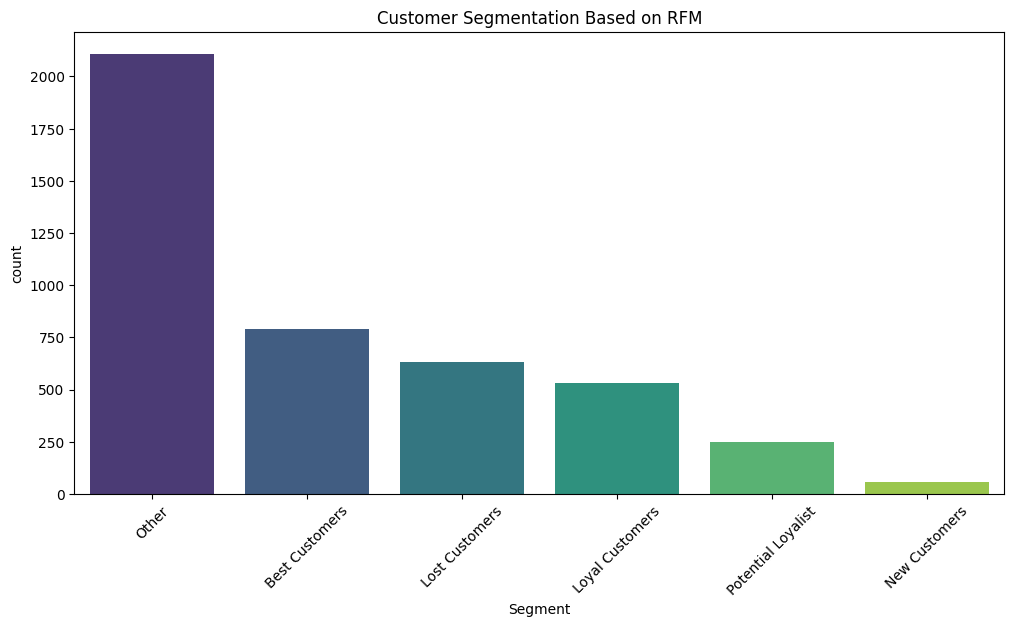

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Customer Segmentation Based on RFM")
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Keep only RFM numerical features
rfm_data = rfm[['Recency', 'Frequency', 'Monetary']]

# Log transformation to handle skewness
rfm_data = rfm_data.apply(lambda x: np.log1p(x))

# Standardization (mean = 0, variance = 1)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

rfm_scaled[:5]  # Show first 5 rows

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[ 1.40291653, -2.09404123, -5.05301076],
       [-2.07513467,  1.16181962,  1.40176449],
       [ 0.39959276, -0.21925126,  0.72738794],
       [-0.53793558,  0.4447154 ,  0.71017392],
       [ 1.36855418, -0.67494648, -0.56777429]])

In [ ]:
print(pd.DataFrame(rfm_scaled).isnull().sum())
rfm_scaled_clean = pd.DataFrame(rfm_scaled).dropna()
print(pd.DataFrame(rfm_scaled_clean).isnull().sum())

0     0
1     0
2    41
dtype: int64
0    0
1    0
2    0
dtype: int64


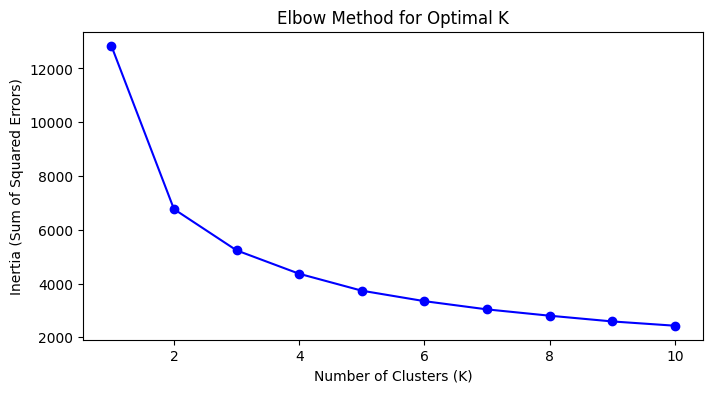

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Try different values of K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_clean)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Ensure we only use non-null rows
rfm_clean = rfm.dropna().copy()

# Re-scale only valid customers
rfm_scaled_clean = scaler.fit_transform(rfm_clean[['Recency', 'Frequency', 'Monetary']])

# Apply K-Means Clustering
optimal_k = 5  # Adjust based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(rfm_scaled_clean)

# Add cluster labels to a new DataFrame
rfm_clean = rfm_clean.copy()
rfm_clean['Cluster'] = clusters  # Now, 'Cluster' column exists

# Show cluster counts
print(rfm_clean['Cluster'].value_counts())

Cluster
1    3050
0    1072
4     241
3       5
2       4
Name: count, dtype: int64


<ipython-input-20-7a95af207275>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=rfm_clean, x='Cluster', palette="viridis")


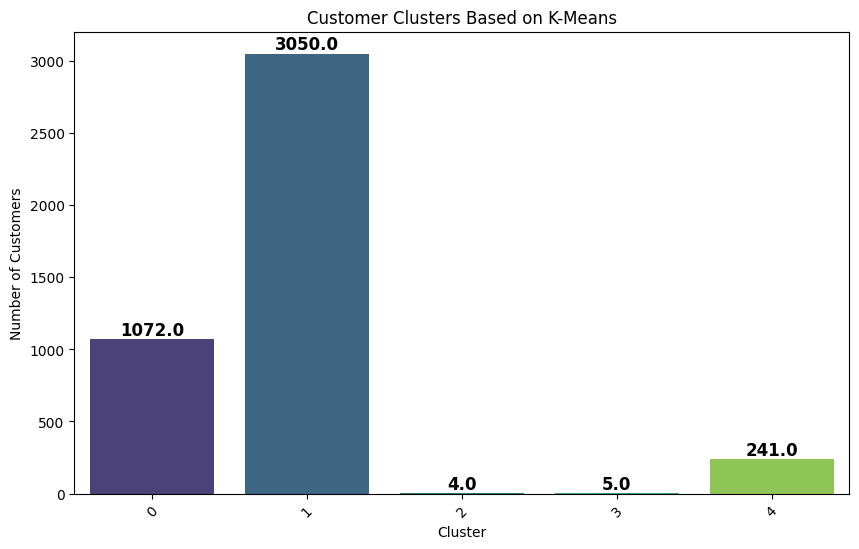

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=rfm_clean, x='Cluster', palette="viridis")

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.title("Customer Clusters Based on K-Means")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

<ipython-input-18-cb64573a83f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Recency', data=rfm_clean, ax=axes[0], palette="viridis")
<ipython-input-18-cb64573a83f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Frequency', data=rfm_clean, ax=axes[1], palette="viridis")
<ipython-input-18-cb64573a83f1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Monetary', data=rfm_clean, ax=axes[2], palette="viridis")


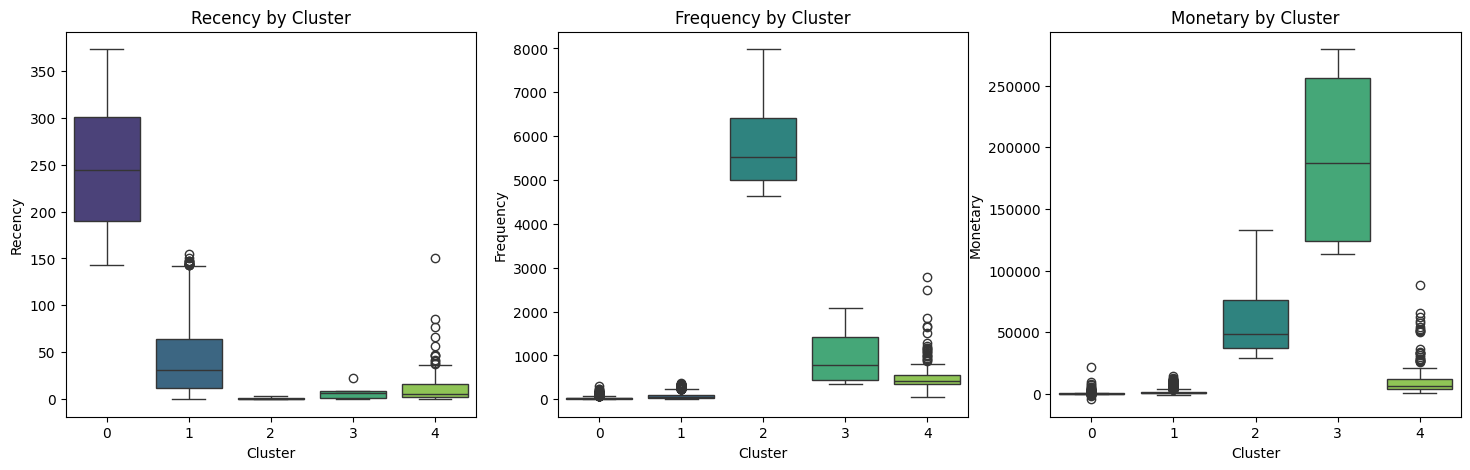

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Cluster', y='Recency', data=rfm_clean, ax=axes[0], palette="viridis")
axes[0].set_title("Recency by Cluster")

sns.boxplot(x='Cluster', y='Frequency', data=rfm_clean, ax=axes[1], palette="viridis")
axes[1].set_title("Frequency by Cluster")

sns.boxplot(x='Cluster', y='Monetary', data=rfm_clean, ax=axes[2], palette="viridis")
axes[2].set_title("Monetary by Cluster")

plt.show()

In [ ]:
rfm_clean.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).sort_values(by='Monetary', ascending=False)

,Recency,Frequency,Monetary
Cluster,,,
3,8.000000,1013.400000,192103.854000
2,1.000000,5914.000000,64776.602500
4,11.373444,501.896266,10857.531867
1,42.227541,74.584918,1299.610968
0,248.581157,27.672575,466.381997
